In [1]:
import matplotlib.pyplot as plt

In [3]:
from common_functions import *

In [5]:
X, y, Xv, yv = load_mini_speech_commands()
def slog(x):
    return np.log(1+np.abs(x))*np.sign(x)
def ulog(x):
    return np.log(1+np.abs(x))
# X = ulog(X)
# Xv = ulog(Xv)

Found 8000 files belonging to 8 classes.
Using 6400 files for training.
Using 1600 files for validation.


In [33]:
model = models.Sequential([
    layers.Input(shape=(128,128,1)),
    layers.Resizing(32, 32),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(8),
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1605760   
                                                      

In [34]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

50/50 [==============================] - 0s 4ms/step - loss: 2.5009 - accuracy: 0.6438


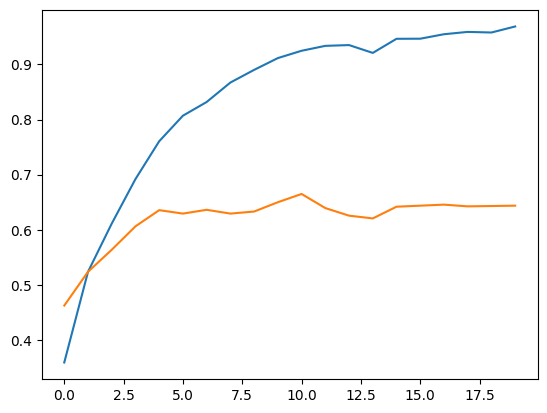

In [35]:
train_acc = [];
test_acc = [];
for i_iter in range(20):
    train_history = model.fit(x=X, y=y, epochs=1, batch_size=128);
    _, test_acc_i = model.evaluate(x=Xv, y=yv)
    train_acc.append(train_history.history['accuracy'][0])
    test_acc.append(test_acc_i)
train_acc = np.vstack(train_acc)
test_acc = np.vstack(test_acc)
plt.plot(train_acc)
plt.plot(test_acc)